In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [49]:
class KMeansClustering:
    def __init__(self, file_path, n_clusters=3):
        """
        Initialize the KMeansClustering class.
        :param file_path: Path to the CSV file containing the data.
        :param n_clusters: Number of clusters for KMeans.
        """
        self.file_path = file_path
        self.n_clusters = n_clusters
        self.df = pd.read_csv(file_path)
        self.x = self.df[["Latitude", "Longitude"]]
        self.scaler = StandardScaler()
        self.x_scaled = self.scaler.fit_transform(self.x)

    def fit(self):
        """
        Fit the KMeans model to the scaled data and predict clusters.
        """
        start_time = time.time()
        self.model = KMeans(n_clusters=self.n_clusters, n_init=10, random_state=42)
        self.y_kmeans = self.model.fit_predict(self.x_scaled)
        self.clustering_time = time.time() - start_time
        self.df['y'] = self.y_kmeans

    def get_data(self):
        """
        Return the DataFrame with cluster labels.
        :return: DataFrame with latitude, longitude, and cluster labels.
        """
        return self.df

    def get_clustering_time(self):
        """
        Return the time taken for the clustering process.
        :return: Clustering time in seconds.
        """
        return self.clustering_time

In [50]:
def plot_clusters(df):
    """
    Plot the clusters of user data on a scatter plot.
    :param df: DataFrame containing latitude, longitude, and cluster labels.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Longitude'], df['Latitude'], c=df['y'], cmap='viridis', alpha=0.6, s=10)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('KMeans Clustering of User Data')
    plt.colorbar(label='Cluster')
    plt.show()

def plot_elbow_method(x_scaled):
    """
    Plot the elbow method for determining the optimal number of clusters.
    :param x_scaled: Scaled feature data (latitude and longitude).
    """
    wcss = []
    for i in range(1, 11):
        model = KMeans(n_clusters=i, n_init=10, random_state=42)
        y_kmeans = model.fit_predict(x_scaled)
        wcss.append(model.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal k')
    plt.show()

In [51]:
def create_map(df, clusters):
    """
    Create and display a map with cluster markers.
    :param df: DataFrame containing latitude, longitude, and cluster labels.
    :param clusters: List of clusters, where each cluster is a list of latitude and longitude pairs.
    :return: Folium map object with cluster markers.
    """
    map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10, 
                     tiles="openstreetmap")
    colors = ['blue', 'red', 'green']
    for i, cluster in enumerate(clusters):
        if len(cluster) > 0:
            for point in cluster:
                folium.CircleMarker(
                    location=point,
                    radius=2,
                    color=colors[i],
                    fill=True,
                    fill_color=colors[i],
                    fill_opacity=0.6
                ).add_to(map)
    return map

Clustering Time: 0.23 seconds


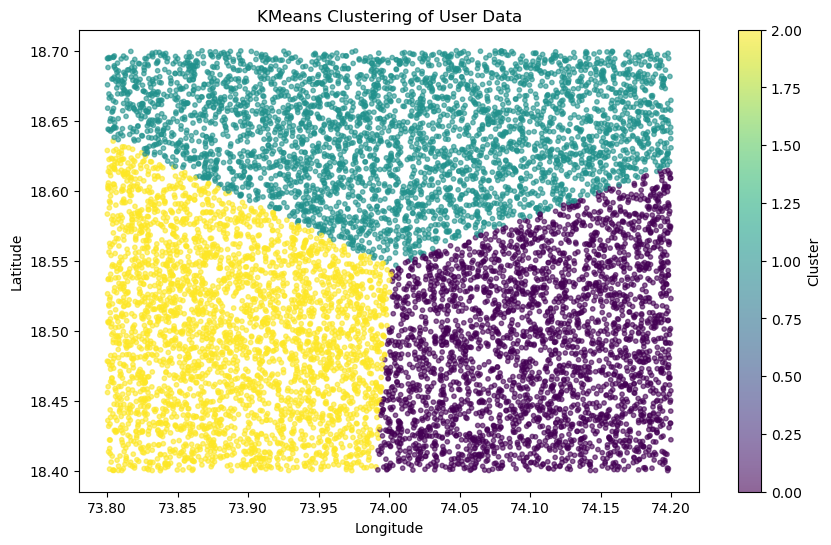

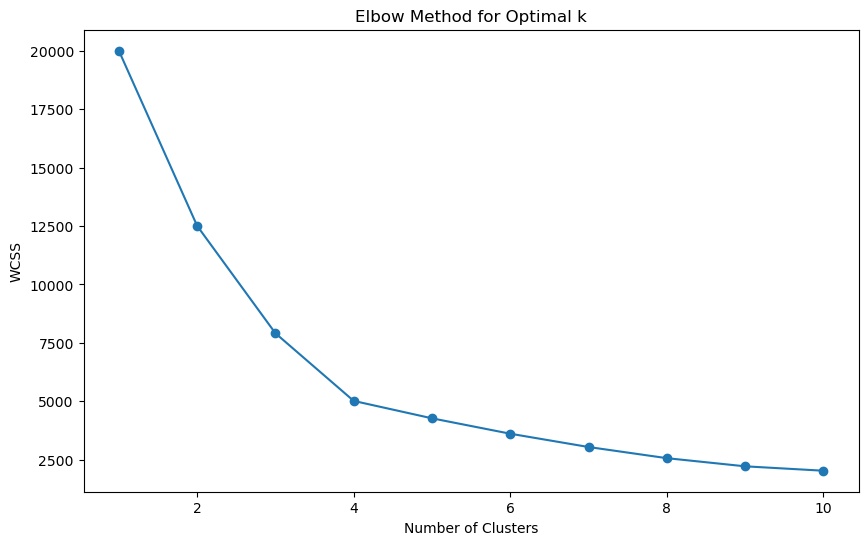

In [52]:
# Load the data and run KMeans clustering
file_path = "unique.csv"  
clustering = KMeansClustering(file_path)
clustering.fit()

df = clustering.get_data()
clustering_time = clustering.get_clustering_time()
print(f"Clustering Time: {clustering_time:.2f} seconds")

plot_clusters(df)
plot_elbow_method(clustering.x_scaled)

# Create and display the map
clusters = [df[['Latitude', 'Longitude']][df['y'] == i].values.tolist() for i in range(clustering.n_clusters)]
map = create_map(df, clusters)
map


